<a href="https://colab.research.google.com/github/benvekedim/machine-learning-101/blob/main/clustering/clustering_performance_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Resource:  https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

## Silhoutte Score

* The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
* Metrik öklid kullanıldı



In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics

# Load iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# KMeans Model

km = KMeans(n_clusters=3)

# Fit the KMeans model

km.fit_predict(X)

# Calculate Silhoutte Score

score = metrics.silhouette_score(X, km.labels_, metric='euclidean')

# Print the score

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.553


In [ ]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Rand Index 
* Given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred, the (adjusted or unadjusted) Rand index is a function that measures the similarity of the two assignments, ignoring permutations:




In [ ]:
from sklearn import metrics 
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.rand_score(labels_true, labels_pred)

0.6666666666666666

* The Rand index does not ensure to obtain a value close to 0.0 for a random labelling. The adjusted Rand index corrects for chance and will give such a baseline.

In [ ]:
metrics.adjusted_rand_score(labels_true, labels_pred)


0.24242424242424243

* As with all clustering metrics, one can permute 0 and 1 in the predicted labels, rename 2 to 3, and get the same score:

In [ ]:
labels_pred = [1, 1, 0, 0, 3, 3]
metrics.rand_score(labels_true, labels_pred) # 0.666...
metrics.adjusted_rand_score(labels_true, labels_pred) #0.2424...

0.24242424242424243

* Furthermore, both rand_score adjusted_rand_score are symmetric: swapping the argument does not change the scores. They can thus be used as consensus measures:

In [ ]:
metrics.rand_score(labels_pred, labels_true)  # 0.666...
metrics.adjusted_rand_score(labels_true, labels_pred)  #0.2424...

0.24242424242424243

* Perfect labeling is scored 1.0:

In [ ]:
labels_pred = labels_true[:]
#labels_pred  #[0, 0, 0, 1, 1, 1]
#labels_true #[0, 0, 0, 1, 1, 1]
metrics.rand_score(labels_true, labels_pred) #1.0
metrics.adjusted_rand_score(labels_true, labels_pred)  #1.0

1.0

## Mutual Information based scores

* Given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred, the Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations. Two different normalized versions of this measure are available, Normalized Mutual Information (NMI) and Adjusted Mutual Information (AMI). NMI is often used in the literature, while AMI was proposed more recently and is normalized against chance:

In [ ]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.2987924581708901

* One can permute 0 and 1 in the predicted labels, rename 2 to 3 and get the same score:

In [ ]:
labels_pred = [1, 1, 0, 0, 3, 3]
metrics.adjusted_mutual_info_score(labels_true, labels_pred)  


0.2987924581708901

* All, mutual_info_score, adjusted_mutual_info_score and normalized_mutual_info_score are symmetric: swapping the argument does not change the score. Thus they can be used as a consensus measure: 

In [ ]:
metrics.adjusted_mutual_info_score(labels_pred, labels_true)  


0.2987924581708903

* Perfect labeling is scored 1.0:

In [ ]:
# labels_pred ile labels_true bu şekilde eşitlendi aynı şey 
labels_pred = labels_true[:]
metrics.adjusted_mutual_info_score(labels_true, labels_pred)   # 1.0
metrics.normalized_mutual_info_score(labels_true, labels_pred)  # 1.0


1.0

* This is not true for mutual_info_score, which is therefore harder to judge:

In [ ]:
metrics.mutual_info_score(labels_true, labels_pred)  
#labels_true  #[0, 0, 0, 1, 1, 1]
#labels_pred #[0, 0, 0, 1, 1, 1]

0.6931471805599452

* Bad (e.g. independent labelings) have non-positive scores:

In [ ]:
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]
metrics.adjusted_mutual_info_score(labels_true, labels_pred)  

-0.16666666666666655

##  Homogeneity, completeness and V-measure

* homogeneity: each cluster contains only members of a single class.
* completeness: all members of a given class are assigned to the same cluster.

* We can turn those concept as scores homogeneity_score and completeness_score. Both are bounded below by 0.0 and above by 1.0 (higher is better):

In [ ]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.homogeneity_score(labels_true, labels_pred) #0.66...
metrics.completeness_score(labels_true, labels_pred) #0.42...

0.420619835714305

* Their harmonic mean called V-measure is computed by v_measure_score:

In [ ]:
metrics.v_measure_score(labels_true, labels_pred) #0.51...


0.5158037429793889

* This function's formula is as follows:
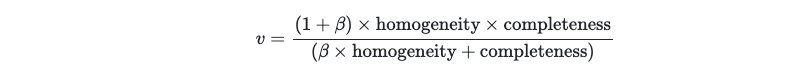
* beta defaults to value of 1.0,but for using a value less than  1 for beta


In [ ]:
metrics.v_measure_score(labels_true, labels_pred, beta=0.6)

0.5467344787062375

* more weight will be attributed to homogeneity, and using a value greater than 1:

In [ ]:
metrics.v_measure_score(labels_true, labels_pred, beta=1.8)

0.48447946234141737

* more weight will be attributed to completeness.

* The V-measure is actually equivalent to the mutual information (NMI) discussed above, with the aggregation function being the arithmetic mean [B2011].

* Homogeneity, completeness and V-measure can be computed at once using homogeneity_completeness_v_measure as follows:

In [ ]:
metrics.homogeneity_completeness_v_measure(labels_true, labels_pred)

(0.6666666666666669, 0.420619835714305, 0.5158037429793889)

* The following clustering assignment is slightly better, since it is homogeneous but not complete:

In [ ]:
labels_pred = [0, 0, 0, 1, 2, 2]
metrics.homogeneity_completeness_v_measure(labels_true, labels_pred)

(1.0, 0.6853314789615865, 0.8132898335036762)

### Fowlkes-Mallows scores
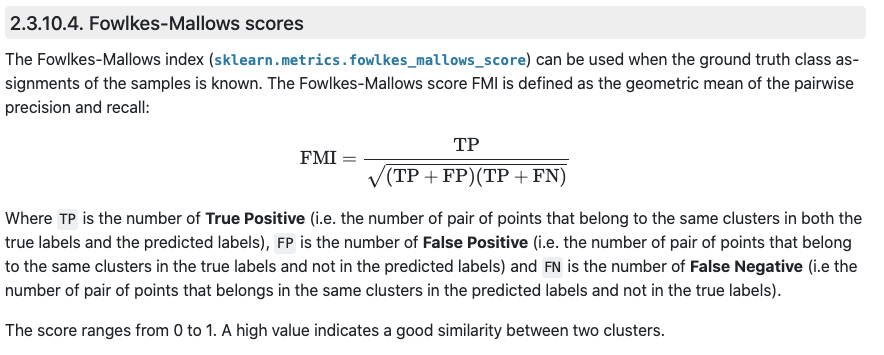

In [ ]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.4714045207910317

* One can permute 0 and 1 in the predicted labels, rename 2 to 3 and get the same score:

In [ ]:
labels_pred = [1,1,0,0,3,3]
metrics.fowlkes_mallows_score(labels_true,labels_pred)

0.4714045207910317

* Perfect labeling is score 1.0 : 

In [ ]:
labels_pred = labels_true[:]
metrics.fowlkes_mallows_score(labels_true, labels_pred)

1.0

* Bad (e.g independent labelings) have zero scores:

In [ ]:
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]
metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.0

## Calinski-Harabasz Index
* If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

* The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)

#In normal usage, the Calinski-Harabasz index is applied to the results of a cluster analysis:

import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3,random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.calinski_harabasz_score(X,labels)


561.62775662962

## Davies-Bouldin Index
* If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

* This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

* Zero is the lowest possible score. Values closer to zero indicate a better partition.

* In normal usage, the Davies-Bouldin index is applied to the results of a cluster analysis as follows:

In [ ]:
from scipy.sparse import data
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=3,random_state=1).fit(X)
labels = kmeans.labels_
davies_bouldin_score(X,labels)

0.6619715465007511

### Accuracy Score

* Accuracy classification score.

* In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [ ]:
# y dediğimiz y_true oluyor
# km.labels_ dediğimiz y_pred oluyor
from sklearn.metrics import accuracy_score
accuracy_score(y,km.labels_)

0.44

## Examples of Adjusted Rand Score 
* Perfectly matching labelings have a score of 1 even
*  1'e ne kadar yakınsa o kadar iyi
* adjusted rand score simetrik
* Kullanılış : sklearn.metrics.adjusted_rand_score(labels_true, labels_pred)


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

In [ ]:
adjusted_rand_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

* Labelings that assign all classes members to the same clusters are complete but may not always be pure, hence penalized:

In [ ]:
adjusted_rand_score([0, 0, 1, 2], [0, 0, 1, 1])

0.5714285714285714

* ARI is symmetric, so labelings that have pure clusters with members coming from the same classes but unnecessary splits are penalized:

In [ ]:
adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 2])

0.5714285714285714

* If classes members are completely split across different clusters, the assignment is totally incomplete, hence the ARI is very low:

In [ ]:
adjusted_rand_score([0, 0, 0, 0], [0, 1, 2, 3])

0.0

* İris için Adjusted Rand Score 

In [ ]:
adjusted_rand_score(y,km.labels_)

0.7302382722834697